# Зависимость времени выполнения от количества процессов (доп. задание)

## Задание
В конспекте вы можете увидеть вот такой график (Interesting_plot), однако текст
с пояснениями и код для его построения пропал. Постройте такой же график у себя
на компьютере (приведите код для построения) и попробуйте проинтерпретировать,
что на нём изображено и какие интересные особенности мы можем подметить
(опишите текстом в маркдаун ячейке).
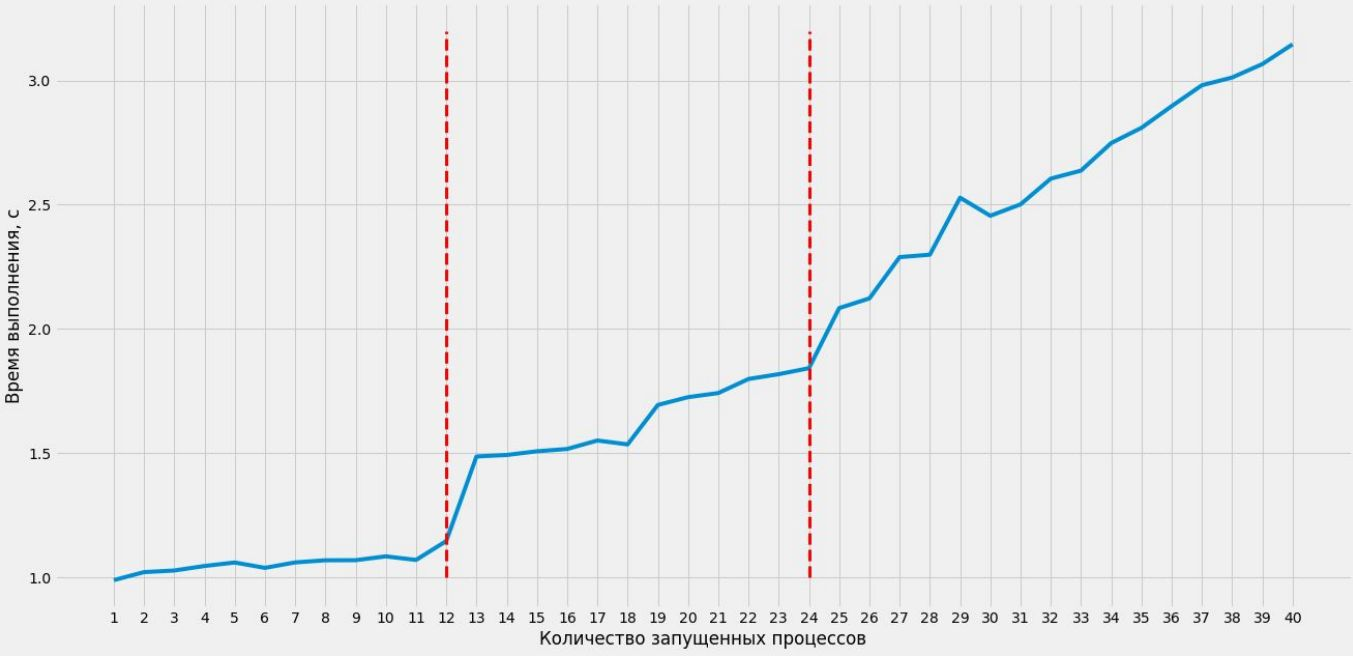

## Как построить график
Из лекции мы знаем, что для построения графика запускается один и тот же CPU-bound процесс. Он запускается одновременно N раз, и измеряется время выполнения всех N процессов. Затем по оси X отмечается N, а по оси Y отмечается время выполнения. N перебирается от 1 до 40. В разультате мы получим график зависимости времени выполнения всех одновременно запущенных CPU-bound процессов от их количества.

## Объяснение гафика
На графике заметны 3 области:
* **от 1 до 12 запущенных процессов** - время их исполнения при увеличении количества процессов увеличивается незначительно.
* **от 13 до 24 запущенных процессов** - время их исполнения при увеличении количества процессов значительно увеличивается.
* **более 25 запущенных процессов** - время их исполнения при увеличении количества процессов увеличивается ещё более значительно.

Почему так происходит? На лекции преподаватель показывал вывод своей утилиты `htop` и мы видели там 24 ядра процессора. Это значит, что фактически на компьютере преподавателя 12 физических ядер и 24 логических.

Предполижим, что компьютер не занят ничем, кроме тестов для построения графика. Тогда при количестве процессов до 12, каждый процесс может исполнятся на отдельном физическом ядре CPU и выполнение прозойдёт одновременно. Поэтому время выполнения всех процессов при увеличении их количества практически не увеличивается.

При количестве процессов от 13 до 24 каждое физическое ядро может исполнять по 2 процесса. Благодаря гипертрэдингу, эти 2 процесса будут исполняться на двух логических ядрах. За счёт этого достигается некая параллельность выполнения, но всё же есть просадка по времени.

При количестве процессов более 25 - физические и даже логические ядра процессора будут выполнять более одного процесса. И это возможно только при поочерёдном исполнении процессов на ядрах процессора. Поэтому в этом случае рост времени выполнения при увеличении количества процессов наиболее существенный.

При другом количестве физических ядер процессора, график будет иметь аналогичный характер, но иные переломные точки на оси X, на которых "заканчиваются" физические ядра процессора, а потом и логические ядра.

## Код

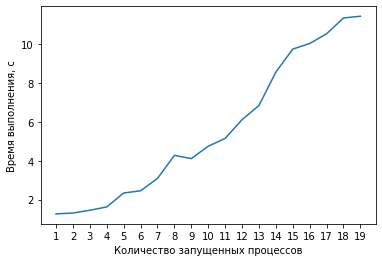

In [23]:
import multiprocessing
import random
import time
import matplotlib.pyplot as plt


# process function
def do_work():
    for _ in range(1000000):
        random.randint(1, 40) ** random.randint(1, 20)
        

n_proc = range(1, 20)
duration = []
        
for n in n_proc:
    t1 = time.time()
    procs = [multiprocessing.Process(target=do_work) for _ in range(n)]
    for proc in procs:
        proc.start()
    for proc in procs:
        proc.join()
    t2 = time.time()
    duration.append(t2 - t1)

    
plt.plot(n_proc, duration)
plt.xticks(n_proc)
plt.xlabel('Количество запущенных процессов')
plt.ylabel('Время выполнения, с')
plt.show()